# Customer Purchase Prediction for Marketing Campaign

### Introduction

In this notebook the goal is to predict the amount of wine a customer will purchase based on their purchase behavior. The data set is from "https://www.kaggle.com/datasets/whenamancodes/customer-personality-analysis" and includes several customer characteristics and various items purchased. 

The wine amount column will be used as the target variable. The data set will be split into training and test sets. The training set will be used to train the model and the test set will be used to evaluate the model.

The important features will be determined and can be used by the marketing team to target customers with similar characteristics to drive wine sales.

### Getting Started


In [1]:
# Import Python Packages and Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [556]:
# Import Data 
df = pd.read_csv('./marketing_campaign.csv', sep='\t')

In [557]:
# Initial Data Exploration
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [558]:
# Check for missing Values
print("Missing Values Present:", df.isnull().values.any())
print("Sum of missing values: ", df.isnull().sum().sum())
print("Columns with NA: ", df.columns[df.isna().any()].tolist())
missing_data = df.isnull().sum()/df.shape[0]*100
# print missing_data if greater than 0
print("Missing Percentage in each column: ", missing_data[missing_data > 0])

Missing Values Present: True
Sum of missing values:  24
Columns with NA:  ['Income']
Missing Percentage in each column:  Income    1.071429
dtype: float64


## Data Preparation and Preprocessing

In [559]:
# Replace missing values with mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

<AxesSubplot: xlabel='Income'>

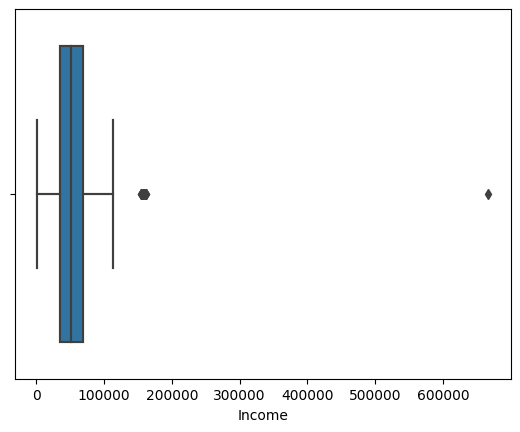

In [560]:
# Check for ouliers in income 
sns.boxplot(x=df['Income'])

# Remove outliers in income
df = df[df['Income'] < 200000]

### Visualize the Categorical Data

Categorical Columns:  ['Education', 'Marital_Status', 'Dt_Customer']


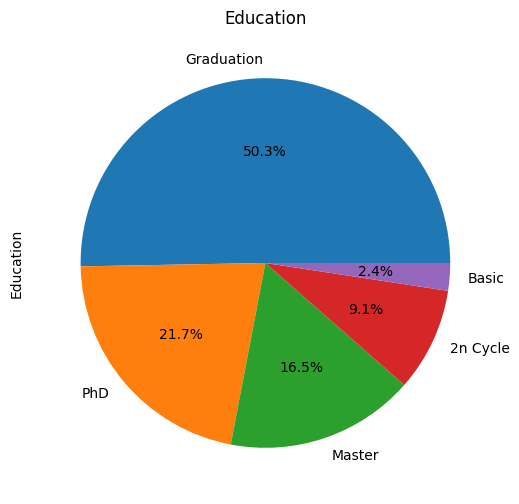

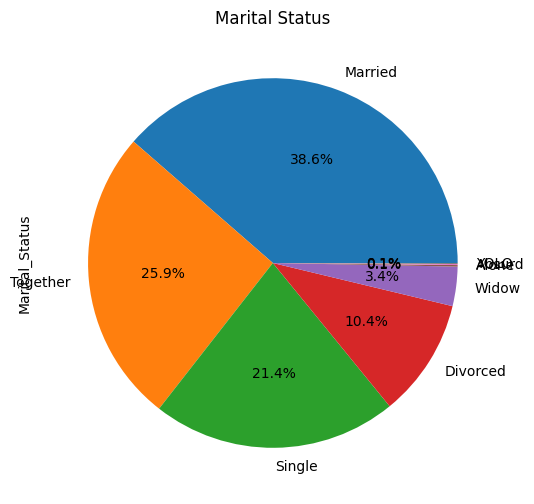

In [561]:
# Check for categorical data 
print("Categorical Columns: ", df.select_dtypes(include=['object']).columns.tolist())

# Pie chart for Education
df['Education'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.title('Education')
plt.show()

# Pie chart for Marital Status 
df['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.title('Marital Status')
plt.show()

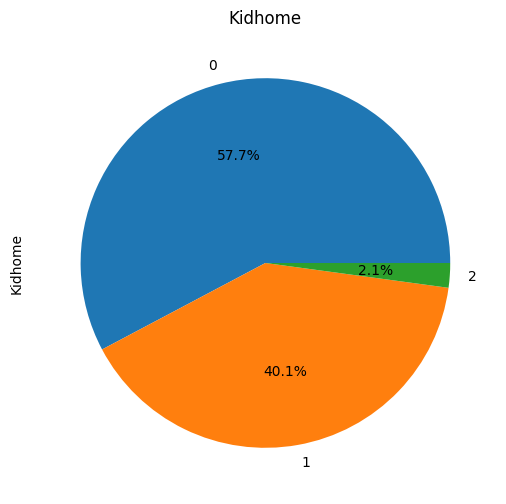

In [562]:
# Pie chart for Kidhome
df['Kidhome'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.title('Kidhome')
plt.show()

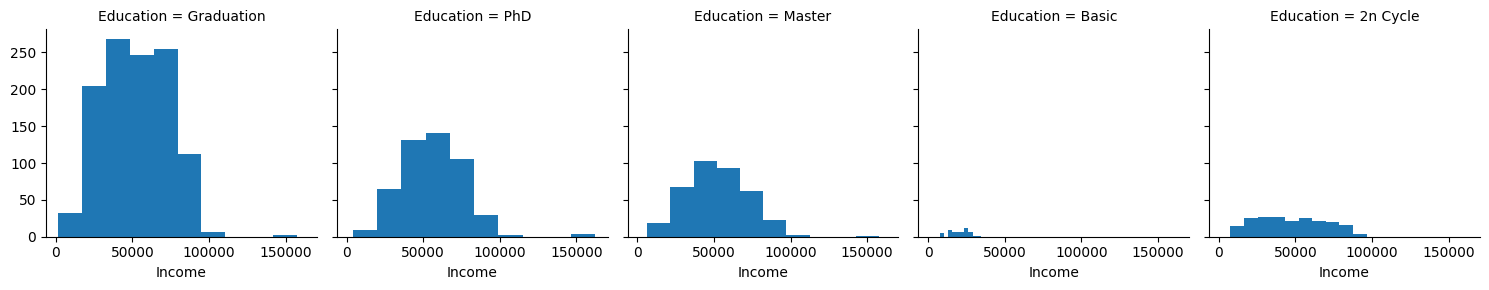

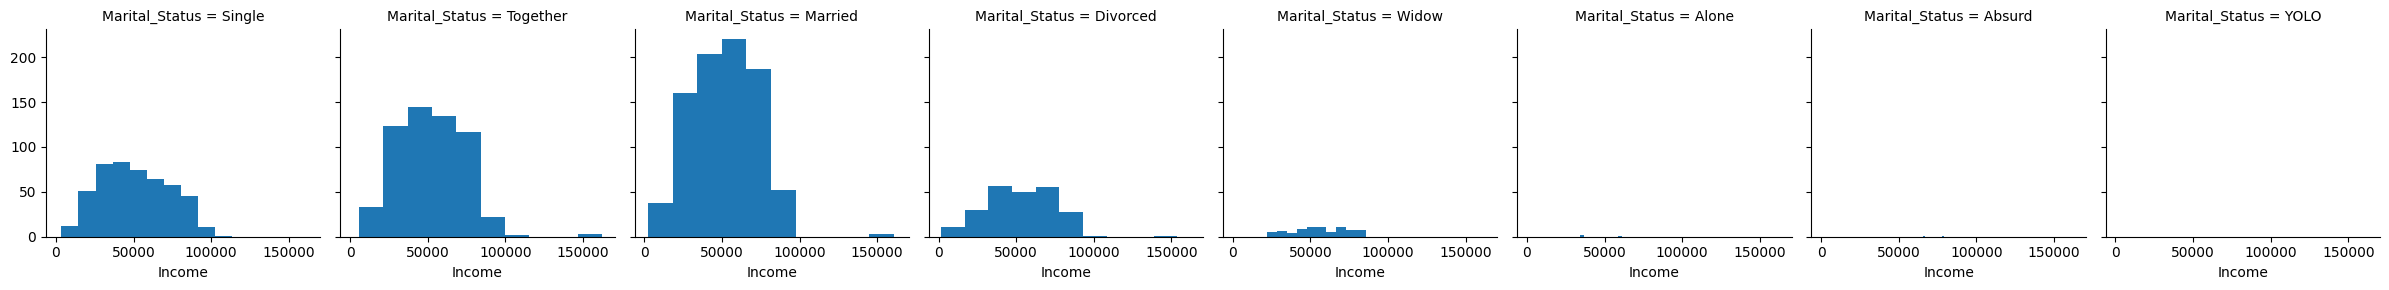

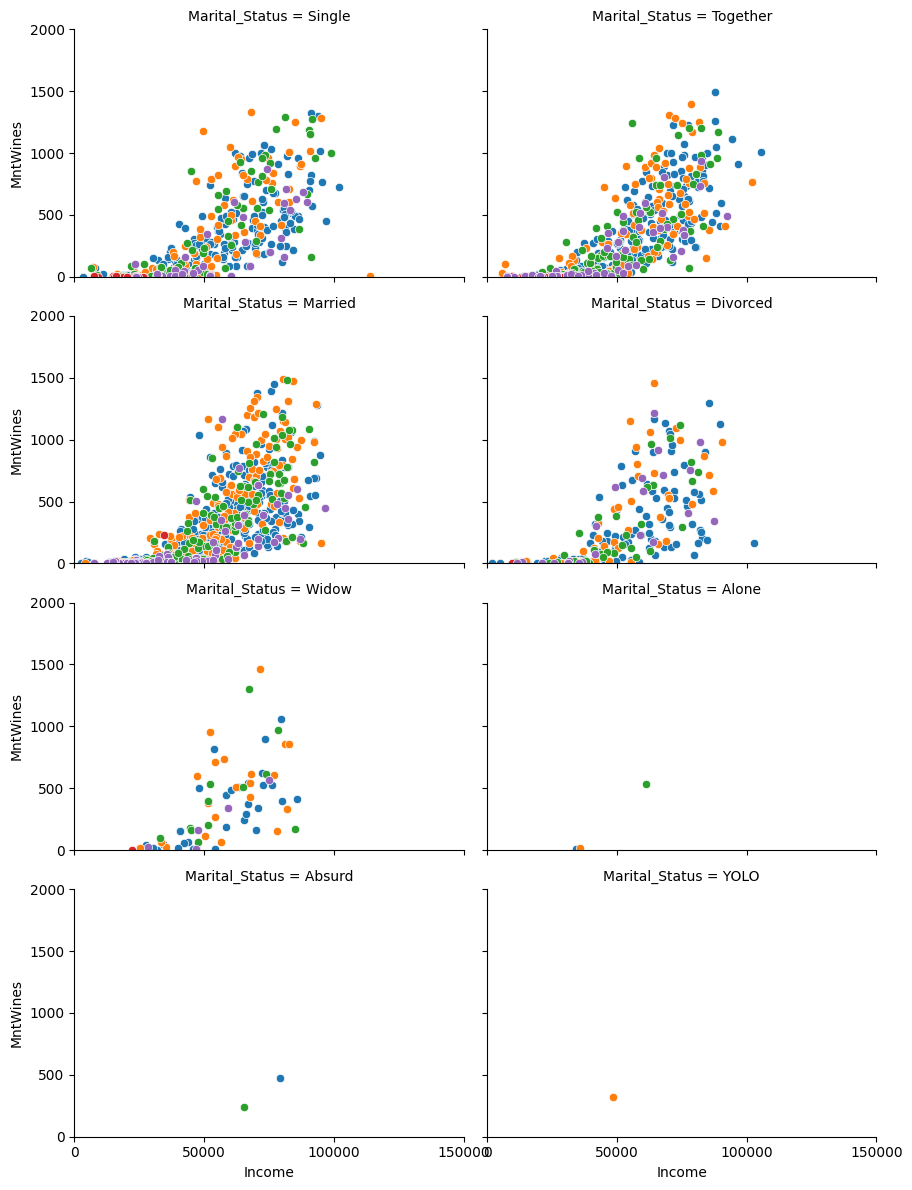

In [563]:
# Facet Grid for Income and Education
g = sns.FacetGrid(df, col='Education')
g.map(plt.hist, 'Income', bins=10)
plt.show()

# Facet Grid for Income and Marital Status
g1 = sns.FacetGrid(df, col='Marital_Status')
g1.map(plt.hist, 'Income', bins=10)
plt.show()

# Facet Grid for Income and MntWines separated by marital status with education as hue
g3 = sns.FacetGrid(df, hue='Education', col='Marital_Status', col_wrap=2, height=3, aspect=1.5)
g3.map(sns.scatterplot, 'Income', 'MntWines')
g3.set(xlim=(0, 150000), ylim=(0, 2000), xticks=[0, 50000, 100000, 150000], yticks=[0, 500, 1000, 1500, 2000])
plt.show()

### Visualize the Numerical Data

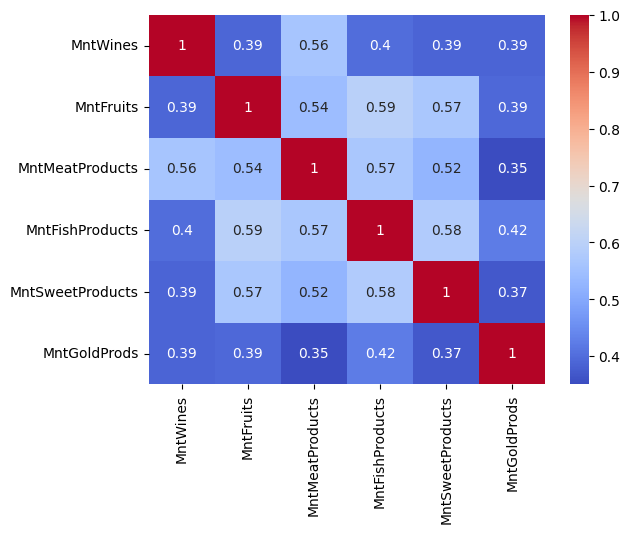

In [564]:
# Correlation Matrix for MtnWines 
corr = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

/var/folders/8t/_x4qcscx7txf2l7h7tx1jwgr0000gn/T/ipykernel_3211/1232788224.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], bins=30)


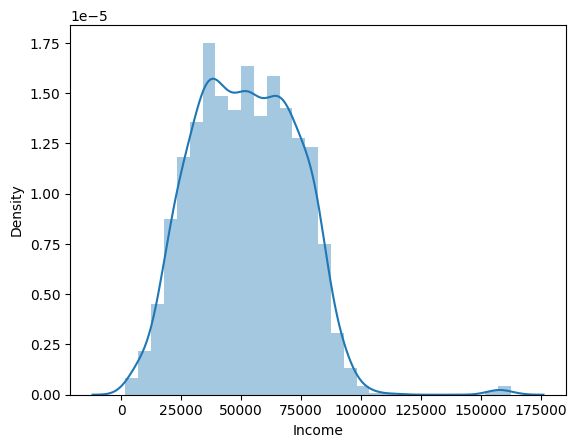

/var/folders/8t/_x4qcscx7txf2l7h7tx1jwgr0000gn/T/ipykernel_3211/1232788224.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MntWines'], bins=30)


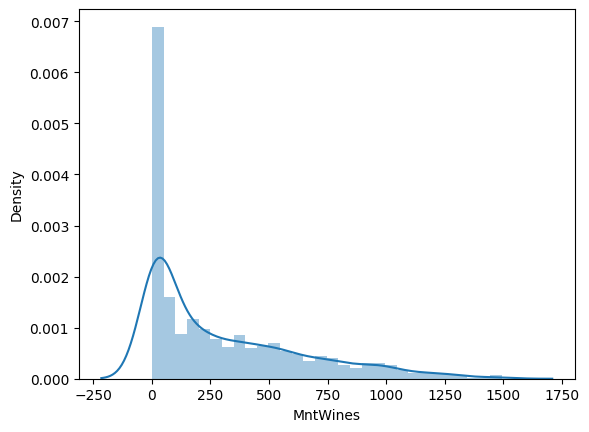

In [565]:
# Plot distribution of Income
sns.distplot(df['Income'], bins=30)
plt.show()

# Plot distribution of MntWines
sns.distplot(df['MntWines'], bins=30)
plt.show()

### Additional Data Preparation

In [566]:
# Additional Data Preprocessing Libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [567]:
# Encode categorical data Education and Marital_Status
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

# Drop columns ID and Dt_Customer
df = df.drop(['ID', 'Dt_Customer'], axis=1)

## Create the Training and Test Sets

In [568]:
# Split data into X and y ("MntWines" is the target variable)
X = df.drop(['MntWines'], axis=1)
y = df['MntWines']

In [569]:
# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [570]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Train the Models

In [588]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
lr_regressor = LinearRegression()

# Fit the model
lr_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = lr_regressor.predict(X_test)

# Evaluate the model
print('Coefficients: \n', lr_regressor.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ -7.80978851  34.78160392   2.24911795  73.05983436 -25.11826021
  -5.43487442   4.76821832  -3.12955147  22.0779606    7.00935745
 -18.02934844  12.43598013 -11.5486444   40.29469363  66.22742482
 101.38434324  67.77443989  13.01985667  42.678923    65.33940582
   9.96301645  10.05872992  -2.97119297   0.           0.
  -0.46122556]
Mean squared error: 33473.34
Coefficient of determination: 0.71


In [575]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Train the model
tree_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
tree_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = tree_regressor.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
 

Mean squared error: 20600.03
Coefficient of determination: 0.82


In [576]:
# Support Vector Regression
from sklearn.svm import SVR

# Train the model
svr_regressor = SVR(kernel='rbf')

# Fit the model
svr_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = svr_regressor.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 93988.73
Coefficient of determination: 0.18


In [577]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Train the model
dt_regressor = DecisionTreeRegressor(random_state=0)

# Fit the model
dt_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 46032.60
Coefficient of determination: 0.60


In [578]:
# K-Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor

# Train the model
knn_regressor = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)

# Fit the model
knn_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 35308.20
Coefficient of determination: 0.69


In [581]:
# XGBoost Regression
from xgboost import XGBRegressor

# Train the model
xgb_regressor = XGBRegressor()

# Fit the model
xgb_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 20798.17
Coefficient of determination: 0.82


In [582]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

# Train the model
gb_regressor = GradientBoostingRegressor()

# Fit the model
gb_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = gb_regressor.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 21457.46
Coefficient of determination: 0.81


In [583]:
# AdaBoost Regression
from sklearn.ensemble import AdaBoostRegressor

# Train the model
ada_regressor = AdaBoostRegressor()

# Fit the model
ada_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = ada_regressor.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 43928.48
Coefficient of determination: 0.62


In [584]:
# Bagging Regression
from sklearn.ensemble import BaggingRegressor

# Train the model
bag_regressor = BaggingRegressor()

# Fit the model
bag_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = bag_regressor.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 23457.97
Coefficient of determination: 0.80


In [585]:
# Extra Trees Regression
from sklearn.ensemble import ExtraTreesRegressor

# Train the model
et_regressor = ExtraTreesRegressor()

# Fit the model
et_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = et_regressor.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 19749.01
Coefficient of determination: 0.83


In [586]:
# Stochastic Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

# Train the model
sgb_regressor = GradientBoostingRegressor()

# Fit the model
sgb_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = sgb_regressor.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 21727.84
Coefficient of determination: 0.81


In [589]:
# Voting Regression
from sklearn.ensemble import VotingRegressor

# Train the model
voting_regressor = VotingRegressor(estimators=[('lr', lr_regressor), ('rf', tree_regressor), ('svr', svr_regressor), ('dt', dt_regressor), ('knn', knn_regressor), ('xgb', xgb_regressor), ('gb', gb_regressor), ('ada', ada_regressor), ('bag', bag_regressor), ('et', et_regressor), ('sgb', sgb_regressor)])

# Fit the model
voting_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = voting_regressor.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 22427.13
Coefficient of determination: 0.81


## Compare the Models

In [591]:
# Compare the models
models = pd.DataFrame({ 
    'Model': ['Linear Regression', 'Random Forest Regression', 'Support Vector Regression', 'Decision Tree Regression', 'K-Nearest Neighbors Regression', 'XGBoost Regression', 'Gradient Boosting Regression', 'AdaBoost Regression', 'Bagging Regression', 'Extra Trees Regression', 'Stochastic Gradient Boosting Regression', 'Voting Regression'],
    'Mean Squared Error': [mean_squared_error(y_test, lr_regressor.predict(X_test)), mean_squared_error(y_test, tree_regressor.predict(X_test)), mean_squared_error(y_test, svr_regressor.predict(X_test)), mean_squared_error(y_test, dt_regressor.predict(X_test)), mean_squared_error(y_test, knn_regressor.predict(X_test)), mean_squared_error(y_test, xgb_regressor.predict(X_test)), mean_squared_error(y_test, gb_regressor.predict(X_test)), mean_squared_error(y_test, ada_regressor.predict(X_test)), mean_squared_error(y_test, bag_regressor.predict(X_test)), mean_squared_error(y_test, et_regressor.predict(X_test)), mean_squared_error(y_test, sgb_regressor.predict(X_test)), mean_squared_error(y_test, voting_regressor.predict(X_test))],
    'Coefficient of Determination': [r2_score(y_test, lr_regressor.predict(X_test)), r2_score(y_test, tree_regressor.predict(X_test)), r2_score(y_test, svr_regressor.predict(X_test)), r2_score(y_test, dt_regressor.predict(X_test)), r2_score(y_test, knn_regressor.predict(X_test)), r2_score(y_test, xgb_regressor.predict(X_test)), r2_score(y_test, gb_regressor.predict(X_test)), r2_score(y_test, ada_regressor.predict(X_test)), r2_score(y_test, bag_regressor.predict(X_test)), r2_score(y_test, et_regressor.predict(X_test)), r2_score(y_test, sgb_regressor.predict(X_test)), r2_score(y_test, voting_regressor.predict(X_test))]})
models.sort_values(by='Mean Squared Error', ascending=True)


,Model,Mean Squared Error,Coefficient of Determination
9,Extra Trees Regression,19749.006997,0.828577
1,Random Forest Regression,20600.027571,0.821190
5,XGBoost Regression,20798.169045,0.819470
6,Gradient Boosting Regression,21457.458672,0.813748
10,Stochastic Gradient Boosting Regression,21727.843866,0.811401
11,Voting Regression,22427.127689,0.805331
8,Bagging Regression,23457.965692,0.796383
0,Linear Regression,33473.339756,0.709449
4,K-Nearest Neighbors Regression,35308.198304,0.693522
7,AdaBoost Regression,43928.478954,0.618697


## Tune the Model

In [ ]:
# Tune Extra Trees Regression
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = et_regressor, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [593]:
# Print Grid Search Results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.734442,0.003549,0.032504,0.005663,True,10,auto,1,2,100,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.754679,0.821534,0.793050,0.789754,0.027393,1624
1,1.427189,0.008193,0.059081,0.005926,True,10,auto,1,2,200,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.757400,0.823232,0.793472,0.791368,0.026917,1578
2,2.135861,0.011926,0.077487,0.005372,True,10,auto,1,2,300,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.757680,0.827216,0.790306,0.791734,0.028406,1550
3,3.006172,0.013433,0.140576,0.016177,True,10,auto,1,2,400,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.757586,0.825786,0.792490,0.791954,0.027845,1534
4,4.395533,0.027694,0.235532,0.026663,True,10,auto,1,2,500,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.759311,0.825855,0.791214,0.792127,0.027174,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,2.606292,0.030854,0.199448,0.004866,False,None,sqrt,4,10,600,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.717076,0.774717,0.743481,0.745091,0.023560,3527
3956,3.019454,0.017341,0.299963,0.046228,False,None,sqrt,4,10,700,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.719167,0.774309,0.746347,0.746608,0.022512,3387
3957,3.515875,0.042225,0.303560,0.037394,False,None,sqrt,4,10,800,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.715832,0.776053,0.743503,0.745129,0.024612,3523
3958,3.603821,0.021123,0.186496,0.011707,False,None,sqrt,4,10,900,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.716615,0.774798,0.745887,0.745767,0.023753,3484


In [594]:
# Print Best Parameters from Grid Search
best_params = pd.DataFrame(grid_search.best_params_, index=[0])
best_params

,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators
0,False,70,auto,2,2,500


In [595]:
# Print Best Estimator from Grid Search
best_estimator = pd.DataFrame(grid_search.best_estimator_.get_params(), index=[0])
best_estimator

,bootstrap,ccp_alpha,criterion,max_depth,max_features,max_leaf_nodes,max_samples,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_jobs,oob_score,random_state,verbose,warm_start
0,False,0.0,squared_error,70,auto,None,None,0.0,2,2,0.0,500,None,False,None,0,False


In [596]:
# Print Best Score from Grid Search
best_score = pd.DataFrame({'Best Score': [grid_search.best_score_]})
best_score

,Best Score
0,0.806522


## Evaluate the Model

In [597]:
# Use the best estimator to predict the test set results
y_pred_et = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_et))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_et))


Mean squared error: 19128.31
Coefficient of determination: 0.83


## Display the Results

In [625]:
# Display the results of the Extra Trees Regression 
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_et, 'Error': y_test - y_pred_et, 'Error %': (y_test - y_pred_et) / y_test * 100})
results

,Actual,Predicted,Error,Error %
1513,423,453.335833,-30.335833,-7.171592
111,1332,905.512833,426.487167,32.018556
1922,1324,832.300333,491.699667,37.137437
461,161,447.965167,-286.965167,-178.239234
2171,918,899.760000,18.240000,1.986928
...,...,...,...,...
1537,431,448.164667,-17.164667,-3.982521
1357,182,418.705167,-236.705167,-130.057784
494,504,717.943833,-213.943833,-42.449173
727,294,431.762667,-137.762667,-46.858050


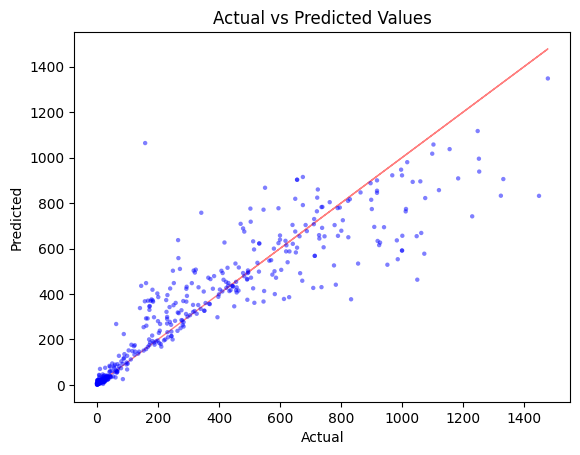

In [604]:
# Create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred_et, color='blue', alpha=0.5, s=10, edgecolors='none', label='Predicted', linewidths=0.5, zorder=2)
# Create a line plot of the actual vs predicted values
plt.plot(y_test, y_test, color='red', alpha=0.5, linewidth=1, zorder=1)
# Add labels and title
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Important Features

In [643]:
# Feature Importance from Extra Trees Regression
# Create a list of the feature names
feature_list = list(X.columns)
# Create a list of the feature importances
importances = list(grid_search.best_estimator_.feature_importances_)
# Create a list of tuples with feature and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out each feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: NumStorePurchases    Importance: 0.18
Variable: Income               Importance: 0.15
Variable: NumCatalogPurchases  Importance: 0.15
Variable: AcceptedCmp5         Importance: 0.11
Variable: MntMeatProducts      Importance: 0.08
Variable: Kidhome              Importance: 0.06
Variable: NumWebPurchases      Importance: 0.05
Variable: NumWebVisitsMonth    Importance: 0.05
Variable: Education            Importance: 0.03
Variable: MntFishProducts      Importance: 0.02
Variable: AcceptedCmp4         Importance: 0.02
Variable: Year_Birth           Importance: 0.01
Variable: Marital_Status       Importance: 0.01
Variable: Teenhome             Importance: 0.01
Variable: Recency              Importance: 0.01
Variable: MntFruits            Importance: 0.01
Variable: MntSweetProducts     Importance: 0.01
Variable: MntGoldProds         Importance: 0.01
Variable: NumDealsPurchases    Importance: 0.01
Variable: AcceptedCmp3         Importance: 0.01
Variable: AcceptedCmp1         Importanc

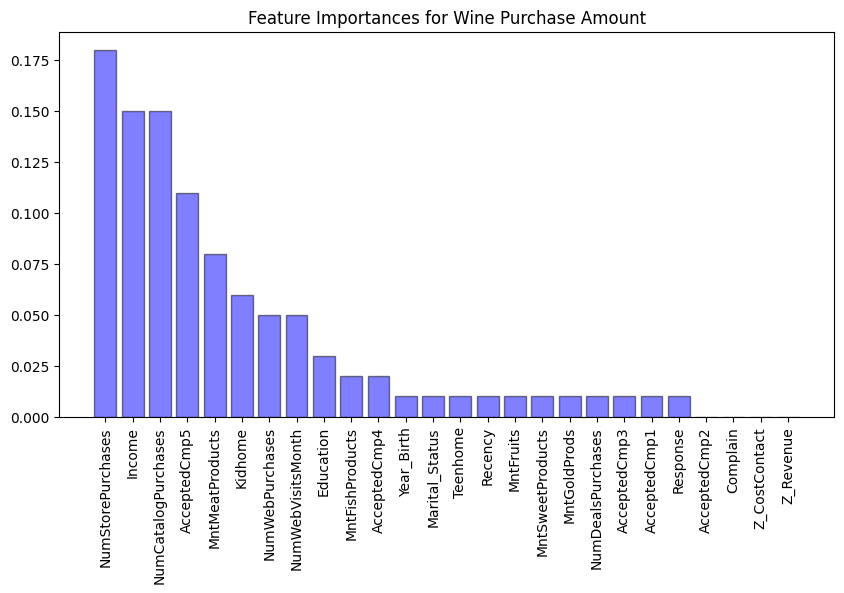

In [645]:
# Plot the feature importances in a bar chart
# Create a list of the feature names
feature_list = list(X.columns)
# Create a list of the feature importances
importances = list(grid_search.best_estimator_.feature_importances_)
# Create a list of tuples with feature and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Create a list of the feature names
features = [pair[0] for pair in feature_importances]
# Create a list of the feature importances
importances = [pair[1] for pair in feature_importances]
# Create a bar chart of the feature importances
plt.figure(figsize=(10, 5))
plt.title('Feature Importances for Wine Purchase Amount')
plt.bar(features, importances, color='blue', alpha=0.5, edgecolor='black', linewidth=1, zorder=2)
plt.xticks(rotation=90)
plt.show()

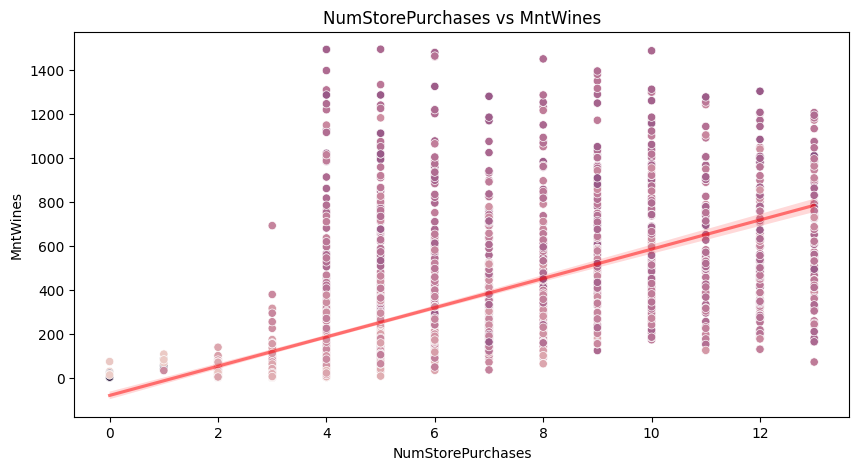

In [714]:
# Display NumStorePurchases vs MntWines in a scatter plot hue Income (no legend)
plt.figure(figsize=(10, 5))
sns.scatterplot(x='NumStorePurchases', y='MntWines', hue='Income', data=df, legend=False)
# Add a regression line
sns.regplot(x='NumStorePurchases', y='MntWines', data=df, scatter=False, color='red', line_kws={'alpha':0.5, 'zorder':1})
# Add labels and title
plt.title('NumStorePurchases vs MntWines')
plt.xlabel('NumStorePurchases')
plt.ylabel('MntWines')
plt.show()


# Summary

### Summary of the Results
The best model was the Extra Tress Regressor with a Coefficient of determination (R^2) of 0.83. The model was able to predict the amount of wine a customer would purchase with 83% accuracy. 

### Important Features
The most important features were the "Number of Store Purchases", "Income", "Number of Catalog Purchases", "Accepting a Coupon by the 5th Period", and "Amount of Meat Purchased". These features can be used by the marketing team to target customers with similar characteristics to drive wine sales.

### Next Steps
The next steps would be to use the model to predict the amount of wine a customer would purchase and then use the results to target customers with similar characteristics to drive wine sales.  

### Recommendations
Promote in-store only coupons to customers that live near a store location.
Promote catalog only coupons to customers that do not live near a store location.
Promote luxury wines to customers that have a high income.
Promote wine and meat bundles to customers that purchase a lot of meat.

### Action Items
Send out an "In-Store Only" coupon to customers that live near a store location. Send out a "Catalog Only" coupon to customers that do not live near a store location. Send out a "Luxury Wine" coupon to customers in affluent neighborhoods. In store, set up a wine display near the meat section to promote wine and meat bundles to customers that purchase a lot of meat. 

### Resources
https://www.kaggle.com/datasets/whenamancodes/customer-personality-analysis


